In [1]:
# 데이터처리
from __future__ import print_function
import numpy as np
import pandas as pd
from IPython.display import display, HTML
# 머신러닝 알고리즘 및 평가
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import pylab
import scipy as sp
import sklearn.preprocessing as preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# 시각화
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\pc-user\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
##### Data Load
dat_dir = 'C:/Users/pc-user/Desktop/yscho/Hanhwa/'
dat = pd.read_csv(dat_dir+'Regression_3_abalone.csv')
display(HTML(dat.to_html()))


In [3]:
##### Data Preprocessing
# split x variable to y variable
x,y = dat.drop(['Y'], axis=1), dat['Y']

In [4]:
# split train to test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2923, 7) (1254, 7) (2923,) (1254,)


In [5]:
# Training the Multivariate Linear Regression Model
lm = sm.OLS(y_train, X_train)
lm_trained = lm.fit()
lm_trained.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     8893.
Date:                Tue, 11 Sep 2018   Prob (F-statistic):               0.00
Time:                        07:58:10   Log-Likelihood:                -6454.1
No. Observations:                2923   AIC:                         1.292e+04
Df Residuals:                    2916   BIC:                         1.296e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Length             4.1107      1.972      2.084      0.037       0.244       7.977
Diameter          12.0038      2.624      4.575      0.000       6.859      17.148
Height            27.8966      2.558     10.904      0.000      22.880      32.913
Whole_weight       7.8155      0.843      9.270      0.000       6.162       9.469
Shucked_weight   -19.6318      0.962    -20.416      0.000     -21.517     -17.746
Viscera_weight   -11.6058      1.516     -7.655      0.000     -14.579      -8.633
Shell_weight       6.7747      1.314      5.156      0.000       4.198       9.351
==============================================================================
Omnibus:                      566.862   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1306.449
Skew:                           1.088   Prob(JB):                    2.03e-284
Kurtosis:                       5.447   Cond. No.                         103.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# Check the Model Assumption: residual by scatter plot
plt.figure(figsize=(6,6))
plt.scatter(lm_trained.fittedvalues, lm_trained.resid , c = 'blue', marker = 'o', label = 'training data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()


In [7]:
# Check the Model Assumption: residual by boxplot
plt.figure()
plt.boxplot(lm_trained.resid)
plt.title('residual_train')
plt.show()

In [8]:
# Check the Model Assumption: normal distribution
plt.figure(figsize=(6,6))
stats.probplot(lm_trained.resid, dist='norm', plot=pylab)
pylab.show()

In [9]:
# prediction y_train
y_pred_train = lm_trained.predict(X_train)
y_pred_train

68      13.514563
548      9.297440
720     13.478340
1551     7.864179
1186    10.129716
636      9.022437
808      9.150028
575      5.927940
3842     8.611265
4019     9.303933
1967    11.008705
749      9.077164
1290     9.574929
3713     5.840931
1933     9.033824
3175     9.903022
2223    13.832323
71       6.065208
932     12.462563
2641    10.197766
2822    10.076432
1387    11.233944
2722    10.159381
430     10.374635
3498     8.932356
4027    11.932490
727     13.386746
3098    12.968285
3969    10.567561
2492     8.690084
          ...    
1870     7.723078
3692     9.413471
2289    11.901316
3819     8.526079
500     11.087514
491      8.212821
606      7.225672
3586    12.651919
3102    10.131912
19       9.902102
1681    10.095527
2607     8.653494
647      7.142175
107      6.287568
638     11.097351
2429    10.588351
1010    11.277324
4070     6.935339
295      9.665665
830     10.353853
2455     9.672151
2163     5.684998
3830    16.322111
197     12.155866
594      9

In [10]:
# prediction y_test
y_pred_test = lm_trained.predict(X_test)
y_pred_test

1190     9.266552
2351     9.712359
2084    10.003708
2625    10.382987
2184     9.270195
869     11.553642
418      5.828501
368     10.722542
889     11.253278
1728     9.593887
1048    10.680225
3922    10.887064
1637     5.630232
14      10.114401
1167    13.242616
3938     5.024208
1435     4.863632
925     10.832056
1513     7.159615
1693     9.857629
2745    11.062312
2252     9.322664
1869    13.961358
3904    13.255801
2787     9.156832
345      9.481424
3229     9.172891
1464     9.738260
2512    10.037954
2071    11.056895
          ...    
2082    13.254917
1771     6.838413
747     11.714806
2096    11.490834
1742    11.005757
3670    12.642917
1426    12.921997
3751     9.206324
1195    10.891641
3455     7.504684
126      7.198757
321     11.551041
604      7.442471
3827     8.183438
2676    12.255756
631      8.684937
2903     7.524701
3196     8.717424
103      6.978569
3028    14.122050
2547     9.810819
2138     4.117867
992      4.825653
1068     9.594247
1542     7

In [11]:
# performance measure: MSE, MAE, MAPE, Rsquared

In [12]:
# MSE: Mean of Squared error
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print("mse_train: %.2f, mse_test: %.2f"
      %(mse_train,mse_test))

mse_train: 4.85, mse_test: 5.85


In [13]:
# MAE: Mean of Absolute error
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
print("mae_train: %.2f, mae_test: %.2f"
      %(mae_train,mae_test))

mae_train: 1.62, mae_test: 1.67


In [14]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [15]:
# MAPE: Mean of absolute percent error
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
print("mape_train: %.2f, mape_test: %.2f"
      %(mape_train,mape_test))


mape_train: 16.12, mape_test: 16.30


In [16]:
# R2 score
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
print("r2_train: %.2f, r2_test: %.2f"
      %(r2_train,r2_test))

r2_train: 0.52, r2_test: 0.48


In [17]:
# residual
residual_train = y_pred_train - y_train
residual_test = y_pred_test - y_test
print(residual_train)
print(residual_test)


68     -6.485437
548     1.297440
720    -1.521660
1551    1.864179
1186    2.129716
636    -0.977563
808     0.150028
575    -1.072060
3842   -1.388735
4019   -1.696067
1967    0.008705
749     2.077164
1290    0.574929
3713   -1.159069
1933   -5.966176
3175    3.903022
2223    3.832323
71     -0.934792
932    -0.537437
2641    1.197766
2822    1.076432
1387    3.233944
2722    1.159381
430     2.374635
3498   -4.067644
4027    1.932490
727    -1.613254
3098    3.968285
3969    2.567561
2492    0.690084
          ...   
1870   -2.276922
3692    1.413471
2289   -4.098684
3819   -0.473921
500     1.087514
491    -0.787179
606    -1.774328
3586    2.651919
3102   -2.868088
19      1.902102
1681    0.095527
2607   -0.346506
647    -2.857825
107    -3.712432
638     1.097351
2429    1.588351
1010    2.277324
4070   -1.064661
295    -1.334335
830     1.353853
2455    0.672151
2163   -0.315002
3830    3.322111
197    -0.844134
594     2.000293
281     1.900653
4022    1.642335
1640    3.1076

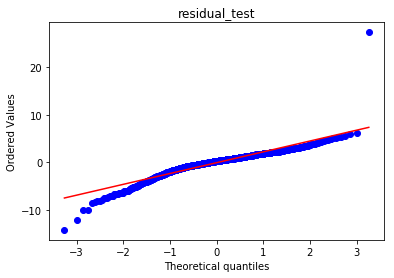

In [18]:
stats.probplot(residual_test, dist="norm", plot=pylab)
plt.title('residual_test')
pylab.show()

In [19]:
plt.figure()
plt.boxplot(residual_test)
plt.title('residual_test')
plt.show()

In [20]:
plt.figure(figsize=(6,6))
plt.scatter(y_pred_train, residual_train , c = 'blue', marker = 'o', label = 'training data')
plt.scatter(y_pred_test, residual_test , c = 'lightgreen', marker = 's', label = 'test data')
plt.xlabel('predicted values')
plt.ylabel('Residual')
plt.title('[multiple variable - Y] Residual Analysis Picture ')
plt.legend(loc=2)
plt.show()
